均方误差

In [2]:
from sklearn.metrics import mean_squared_error # MSE 均方误差
y_test    = [2,2,0,0,2]
y_predict = [0,2,0,0,0]

mean_squared_error(y_test,y_predict) # (4+0+0+0+4)/5=1.6

1.6

相关系数

In [19]:
## 相关系数计算
import numpy as np
X1 = np.array([65, 72, 78, 65, 72, 70, 65, 68])
X2 = np.array([72, 69, 79, 69, 84, 75, 60, 73])
print(np.corrcoef(X1, X2))

# +__                  __+
# |cov(X1,X1), cov(X1,X2)|
# |cov(X2,X1), cov(X2,X2)|
# +__                  __+

import plotly.graph_objects as go
from plotly.subplots import make_subplots
f1 = make_subplots(rows=1, cols=1)
trace = go.Scatter(mode='markers',x=X1,y=X2,opacity=0.5,marker=dict(color='LightSkyBlue',size=10,line=dict(color='MediumPurple',width=2)),name='Opacity 0.5')
f1.append_trace(trace, 1, 1)
f1.update_layout(height=500, 
                width=500, 
                title_text=f"{np.corrcoef(X1, X2)[0][-1]}")
f1.show()
# f1.write_html(f'{eq_i}.html')

[[1.         0.64897259]
 [0.64897259 1.        ]]


小提琴图

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


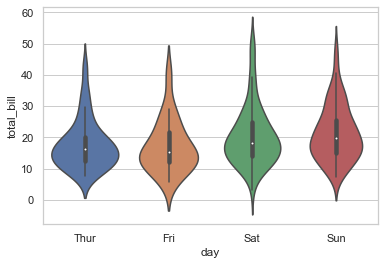

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# 读取数据
tips = sns.load_dataset("tips")
print(tips)
"""
案例2：
绘制一个按分类变量分组的垂直小提琴图
"""
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()


C:\Users\Lip\AppData\Local\Temp\ipykernel_5328\2215029135.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




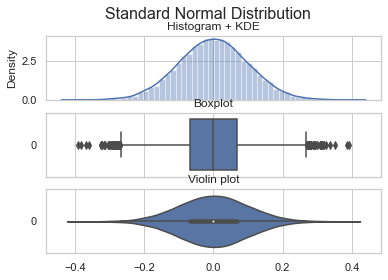

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
N = 10 ** 4
np.random.seed(42)
def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],orient='h')
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],orient='h')
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()
sample_gaussian = np.random.normal(loc=0, scale=0.1, size=N)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')


2.2 赛题数据探索

查看数据 

.info(); .describe(); .head()

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

train_data_file = "./zhengqi_train.txt"
test_data_file = "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data  = pd.read_csv(test_data_file,  sep='\t', encoding='utf-8')

# train_data.info() # 用于查看各特征及标签有无缺失
# test_data.info()

# train_data.describe()
# test_data.describe()

train_data.head() # 显示前5行
test_data.head()

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  

[5 rows x 38 columns]

Box plot

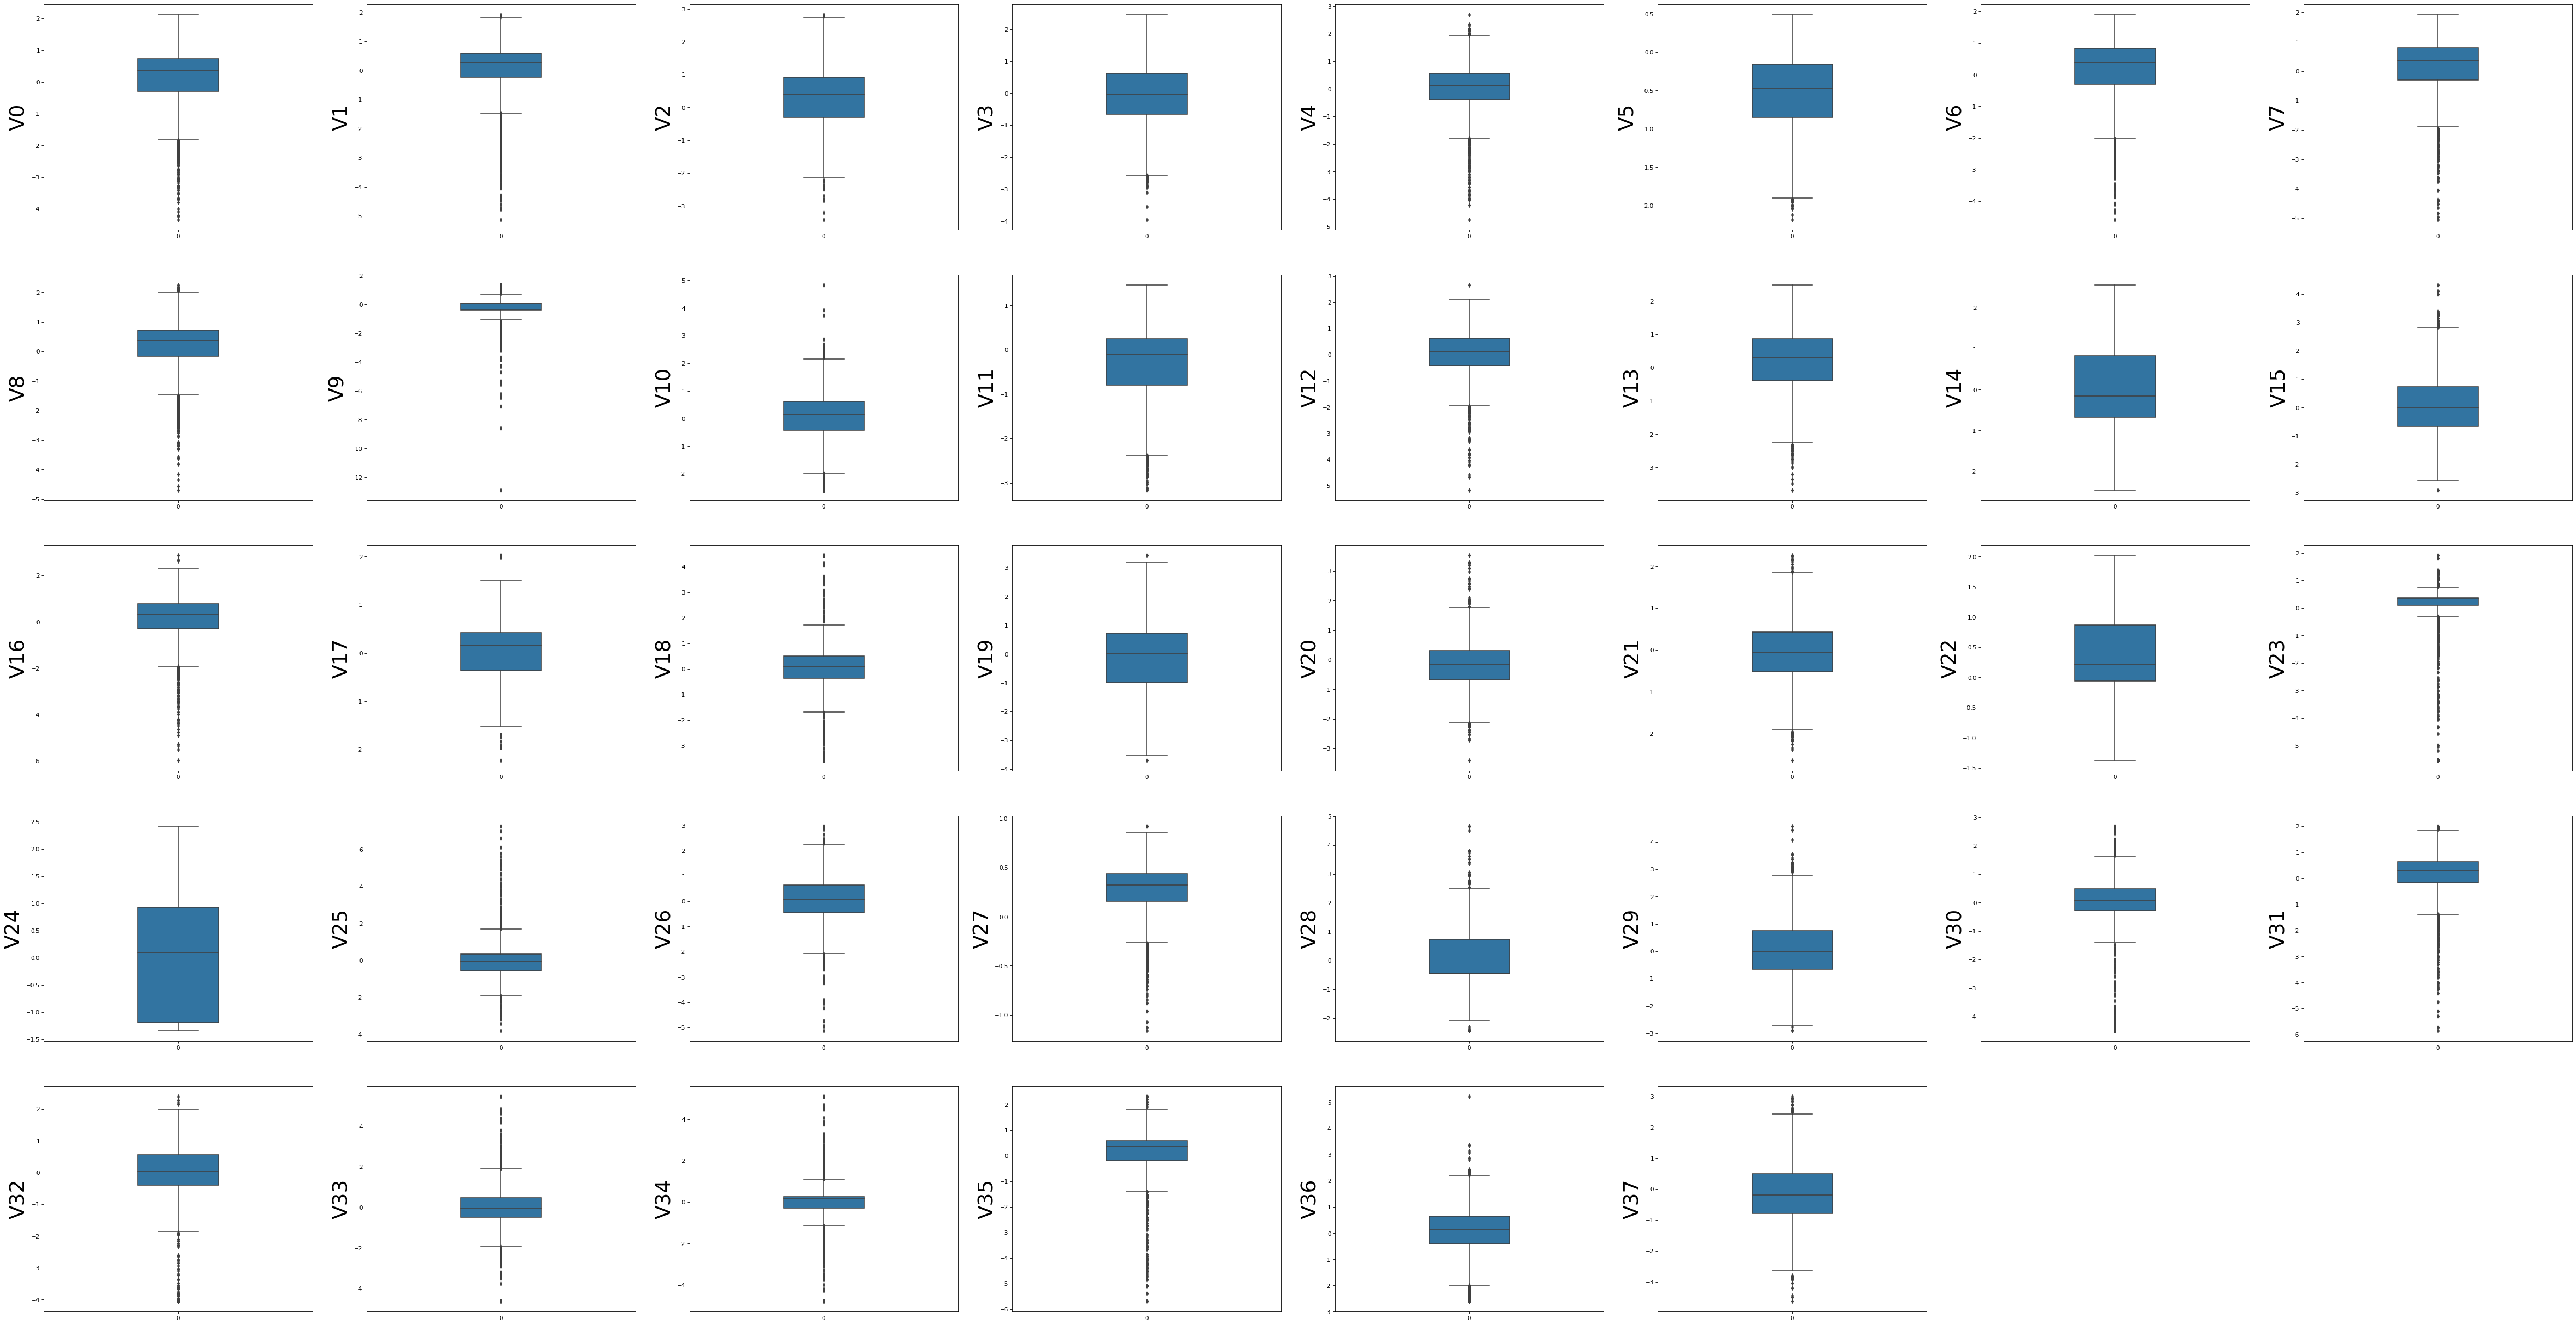

In [22]:
colNum = 38
column = train_data.columns.tolist()[:colNum+1]  # 各列表头, colNum+1不包括在内
fig = plt.figure(figsize=(80,60), dpi=75) 
for i in range(colNum): # 生成[0,1,2,...,colNum]
    plt.subplot(7,8, i+1) # 7行8列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.3)
    plt.ylabel(column[i], fontsize=36)
plt.show()


Q-Q图

将数据的分位数  与  正态分布的分位数  做对比参照的图

若数据符合正态分布，则数据点会落在直线上

'\nprobplot绘制Q-Q图\n红色线 由 “fit=True”控制\n其含义是：如果当前数据是正太分布，我们按正太分布拟合后，mu=0, mu+1sigma=1,...\n蓝色散点图则是我们实际数据的各个分位数quantile的值\n蓝色与红色吻合程度越高，说明该数据越符合当前的分布（默认是gaussian分布)\n'

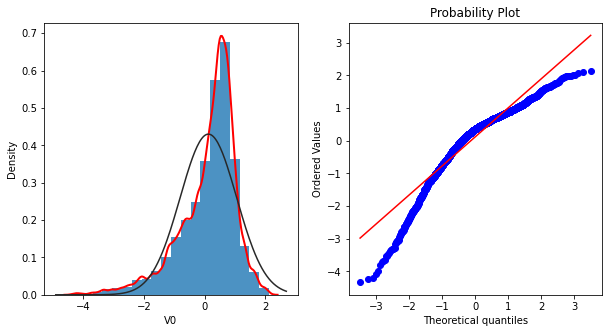

In [43]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.distplot(train_data['V0'], bins=20, hist_kws={"alpha":0.8}, kde_kws={'lw':2, 'color': 'red', 'bw':0.1}, fit=stats.norm)
'''
KDE: Kernal Density Estimation: estimate the probability density function
'''
ax = plt.subplot(1,2,2)
res = stats.probplot(train_data['V0'], dist='norm', fit=True, plot=plt)
'''
probplot绘制Q-Q图
红色线 由 “fit=True”控制
其含义是：如果当前数据是正太分布，我们按正太分布拟合后，mu=0, mu+1sigma=1,...
蓝色散点图则是我们实际数据的各个分位数quantile的值
蓝色与红色吻合程度越高，说明该数据越符合当前的分布（默认是gaussian分布)
'''

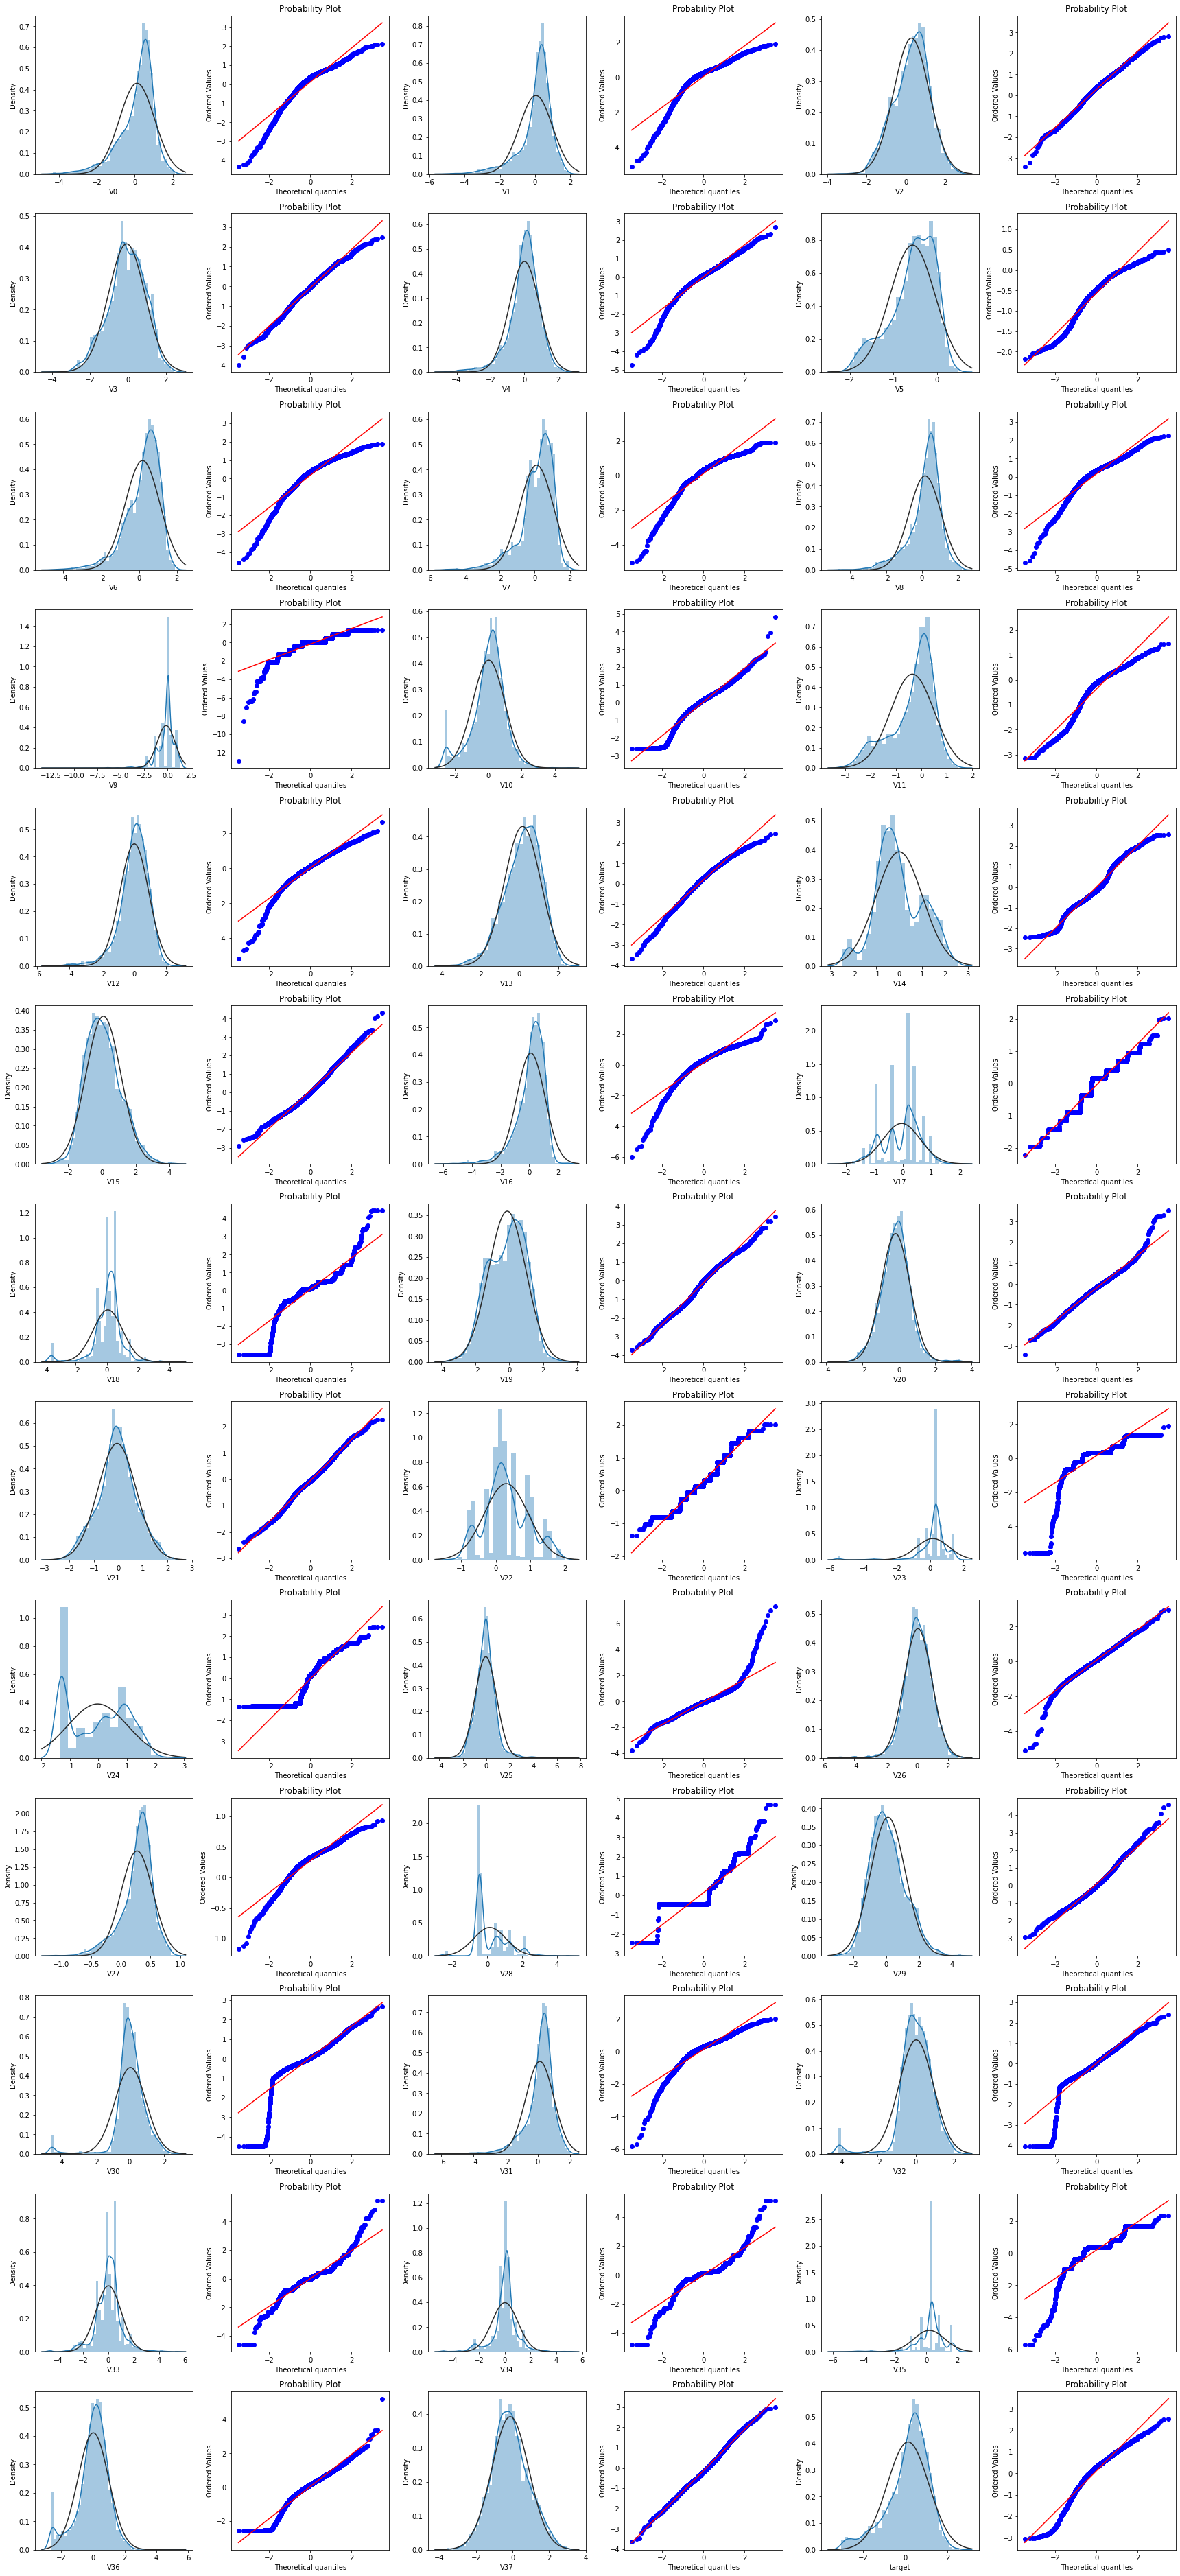

In [44]:
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols, 4*train_rows))
i = 0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_data[col],fit=stats.norm)
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.tight_layout()
plt.show()

KDE分布图

对直方图的加窗平滑

查看  训练集  与  测试集  中  相同特征的kde分布，如果不一致，可能导致训练的模型“泛化能力变差”

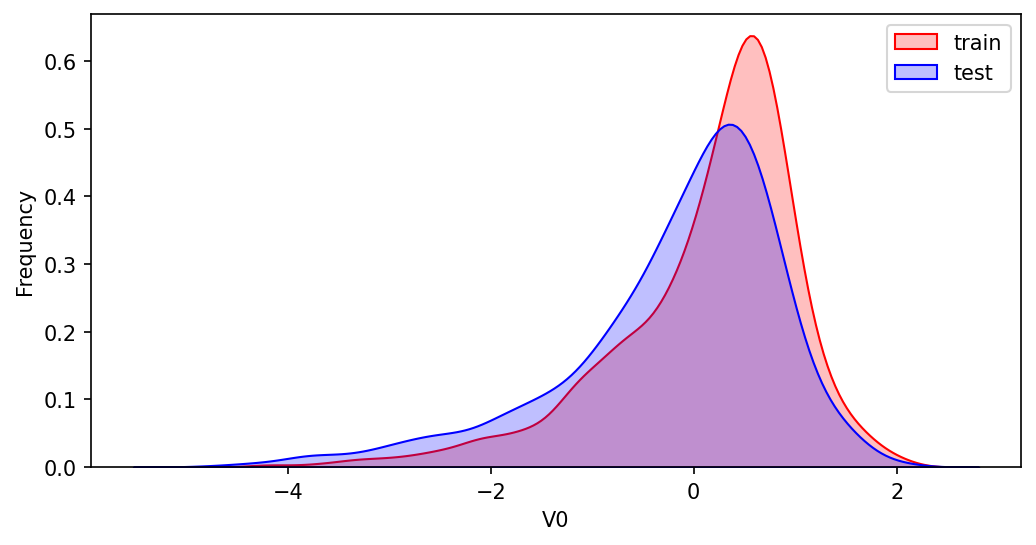

In [45]:
plt.figure(figsize=(8,4), dpi=150)
ax = sns.kdeplot(train_data['V0'], color="Red",  shade=True)
ax = sns.kdeplot( test_data['V0'],  color="Blue", shade=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(["train","test"])

38


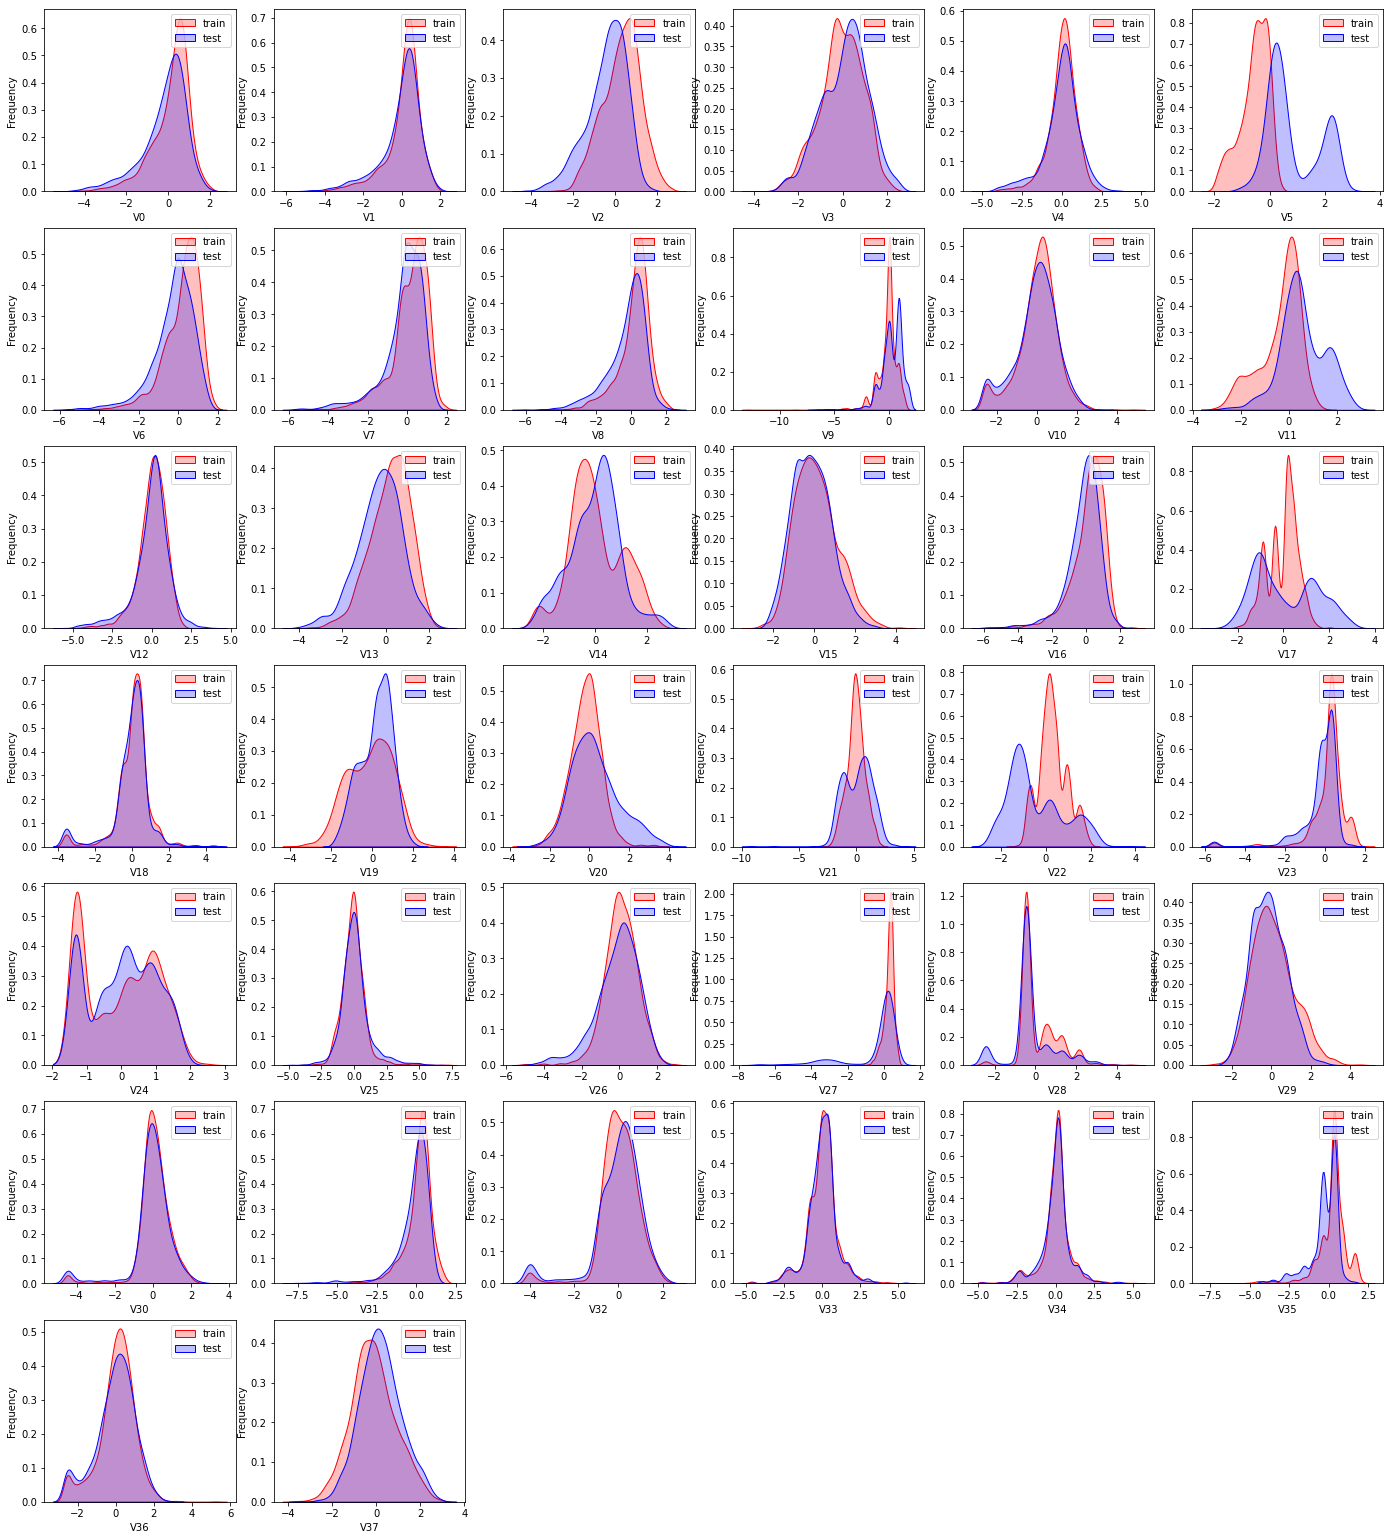

In [56]:
dist_cols = 6
dist_rows = len(test_data.columns)
print(dist_rows)
plt.figure(figsize=(4*dist_cols, 4*dist_rows))
i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i) # 虽然输入的38行，但最终显示时，没有画的子图位置不显示
    ax = sns.kdeplot(train_data[col], color="Red",  shade=True)
    ax = sns.kdeplot( test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(['train','test'])
    i += 1
plt.show()

线性回归关系图

查看各个特征  与  输出target字段  的线性关系

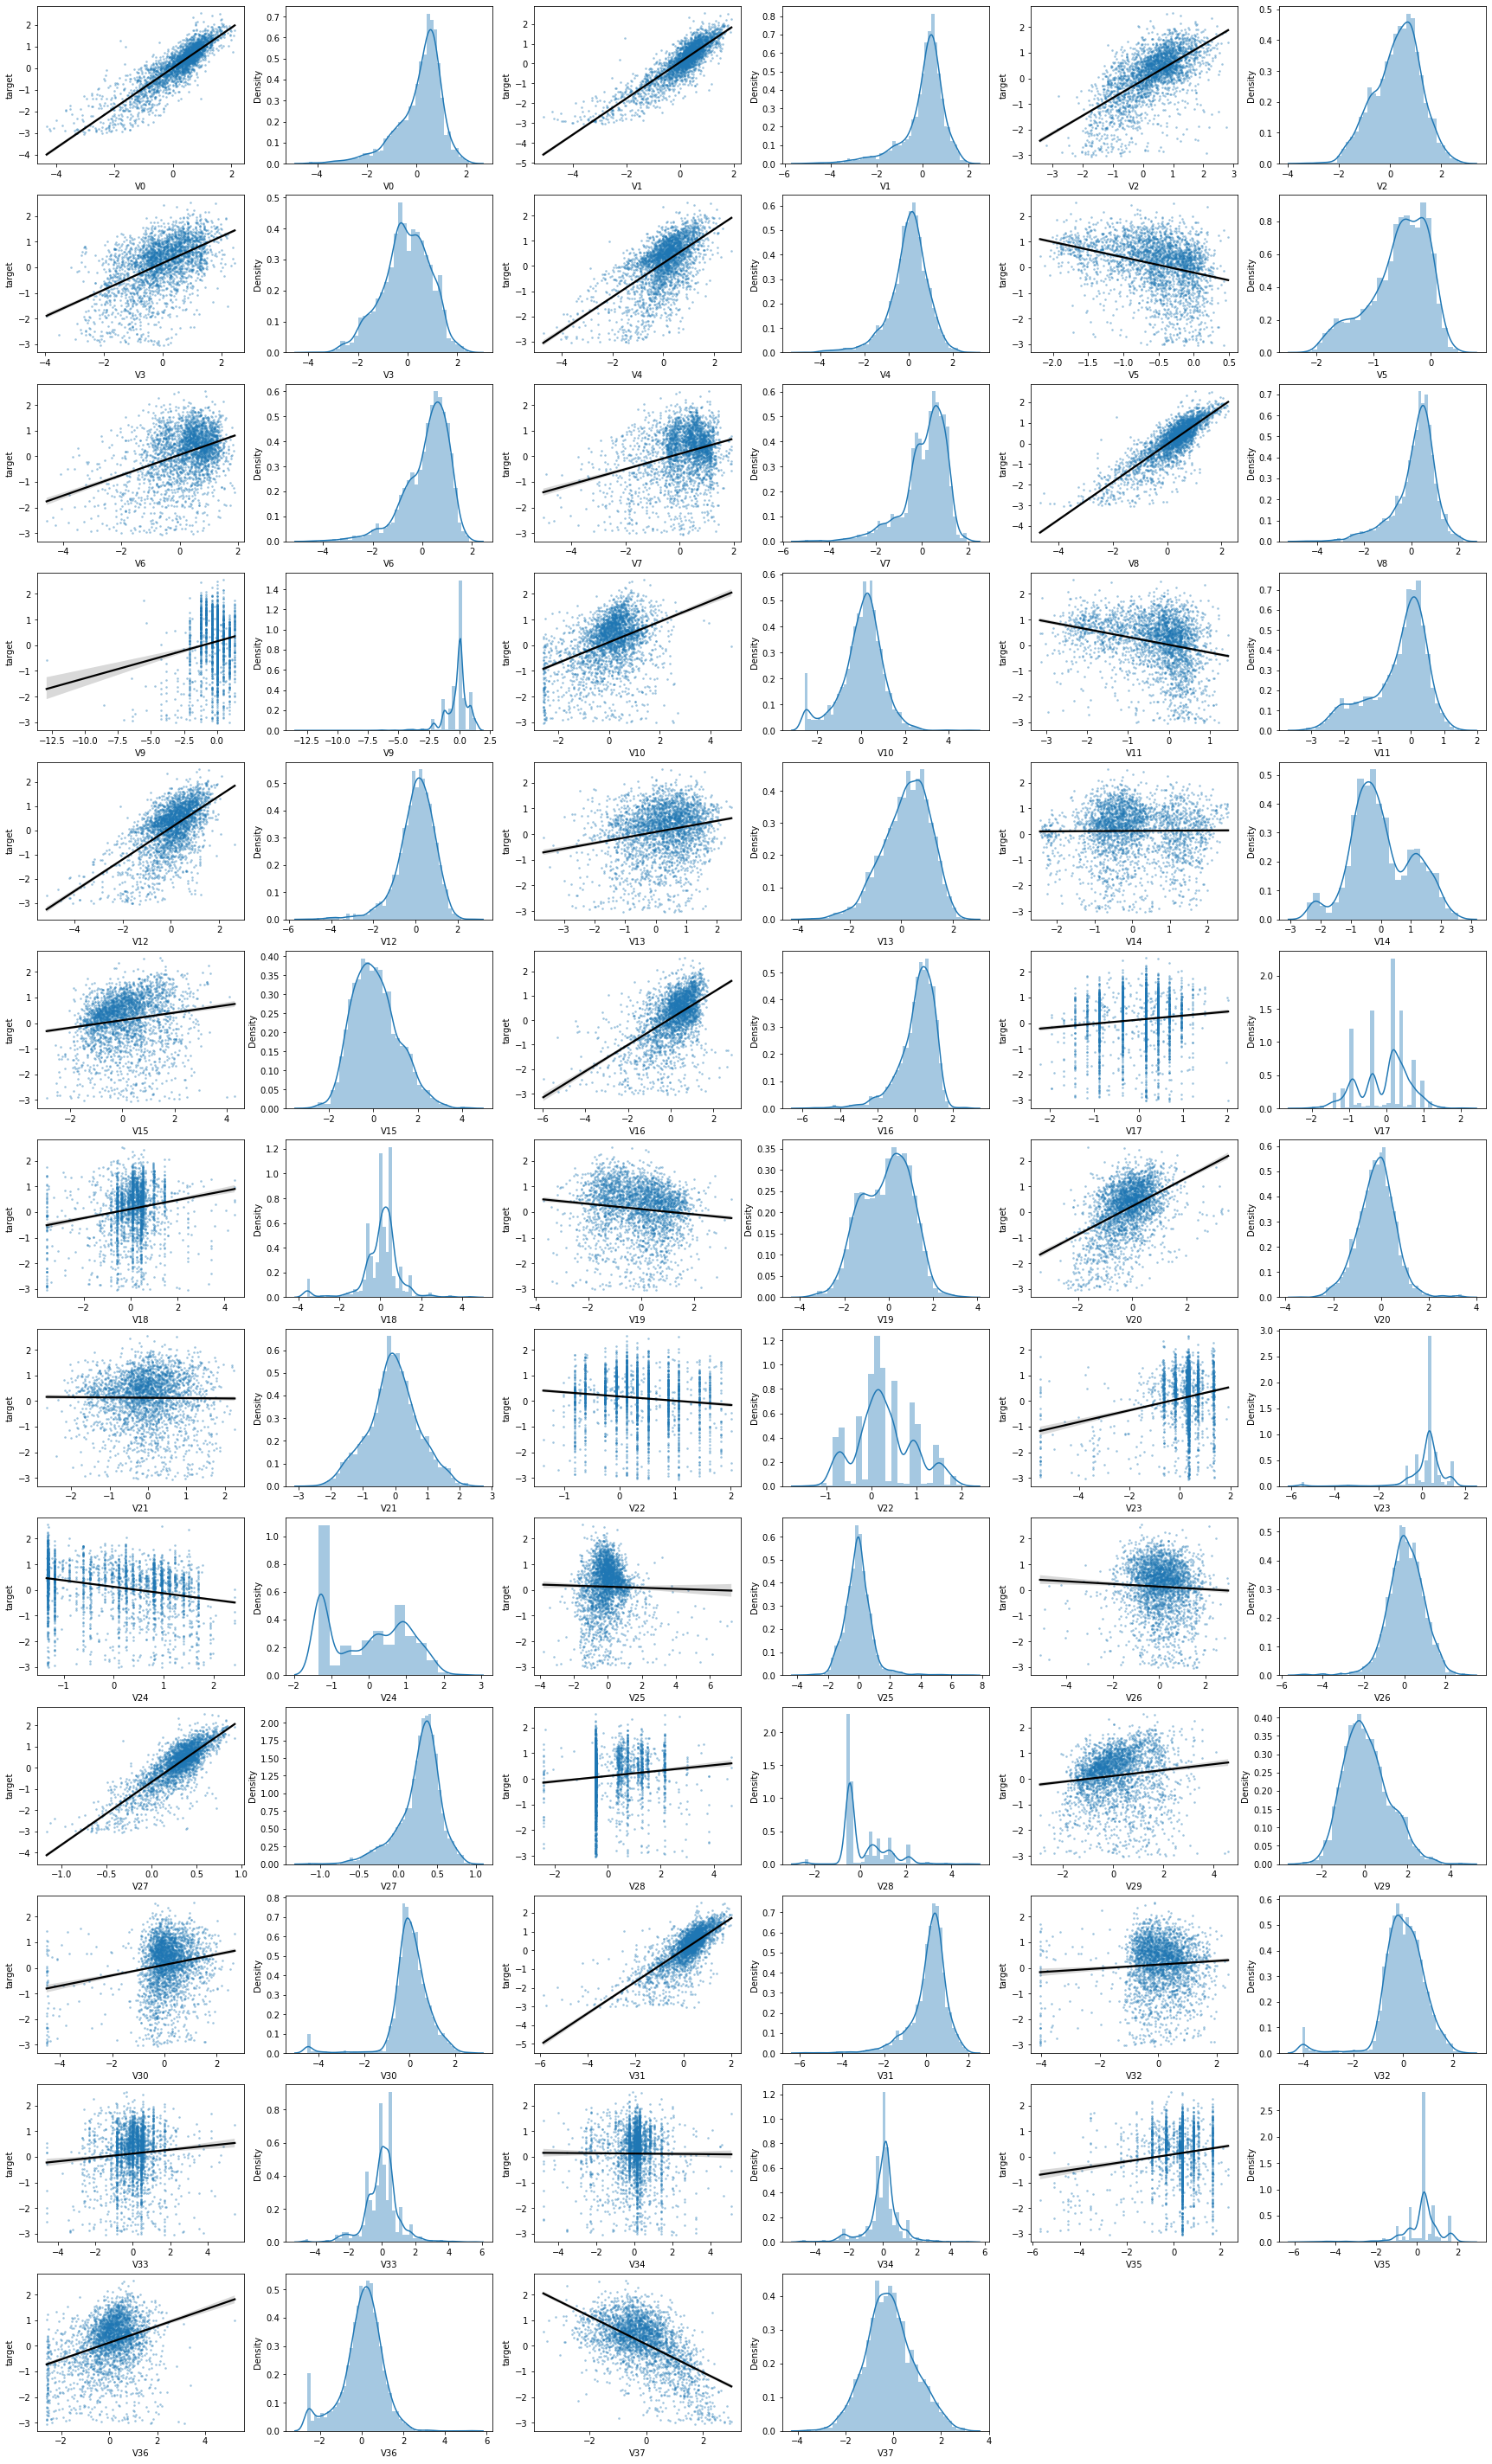

In [68]:
fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols, 4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax=plt.subplot(frows, fcols, i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax,
                ci=80,
                scatter_kws={'marker':'d','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    i+=1
    ax=plt.subplot(frows, fcols, i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)

计算相关系数+热力图

In [69]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis=1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4  ...       V34  \
V0      1.000000  0.908607  0.463643  0.409576  0.781212  ... -0.019342   
V1      0.908607  1.000000  0.506514  0.383924  0.657790  ... -0.029115   
V2      0.463643  0.506514  1.000000  0.410148  0.057697  ... -0.025620   
V3      0.409576  0.383924  0.410148  1.000000  0.315046  ... -0.031898   
V4      0.781212  0.657790  0.057697  0.315046  1.000000  ...  0.028659   
...          ...       ...       ...       ...       ...  ...       ...   
V34    -0.019342 -0.029115 -0.025620 -0.031898  0.028659  ...  1.000000   
V35     0.138933  0.146329  0.043648  0.080034  0.100010  ...  0.233616   
V36     0.231417  0.235299  0.316462  0.324475  0.113609  ... -0.019032   
V37    -0.494076 -0.494043 -0.734956 -0.229613 -0.031054  ... -0.006854   
target  0.873212  0.871846  0.638878  0.512074  0.603984  ... -0.006034   

             V35       V36       V37    target  
V0      0.138933  0.231417 -0.494076  0.873212  
V1      0.146329  0.235299 -0.494043  0.871846  
V2      0.043648  0.316462 -0.734956  0.638878  
V3      0.080034  0.324475 -0.229613  0.512074  
V4      0.100010  0.113609 -0.031054  0.603984  
...          ...       ...       ...       ...  
V34     0.233616 -0.019032 -0.006854 -0.006034  
V35     1.000000  0.025401 -0.077991  0.140294  
V36     0.025401  1.000000 -0.039478  0.319309  
V37    -0.077991 -0.039478  1.000000 -0.565795  
target  0.140294  0.319309 -0.565795  1.000000  

[33 rows x 33 columns]

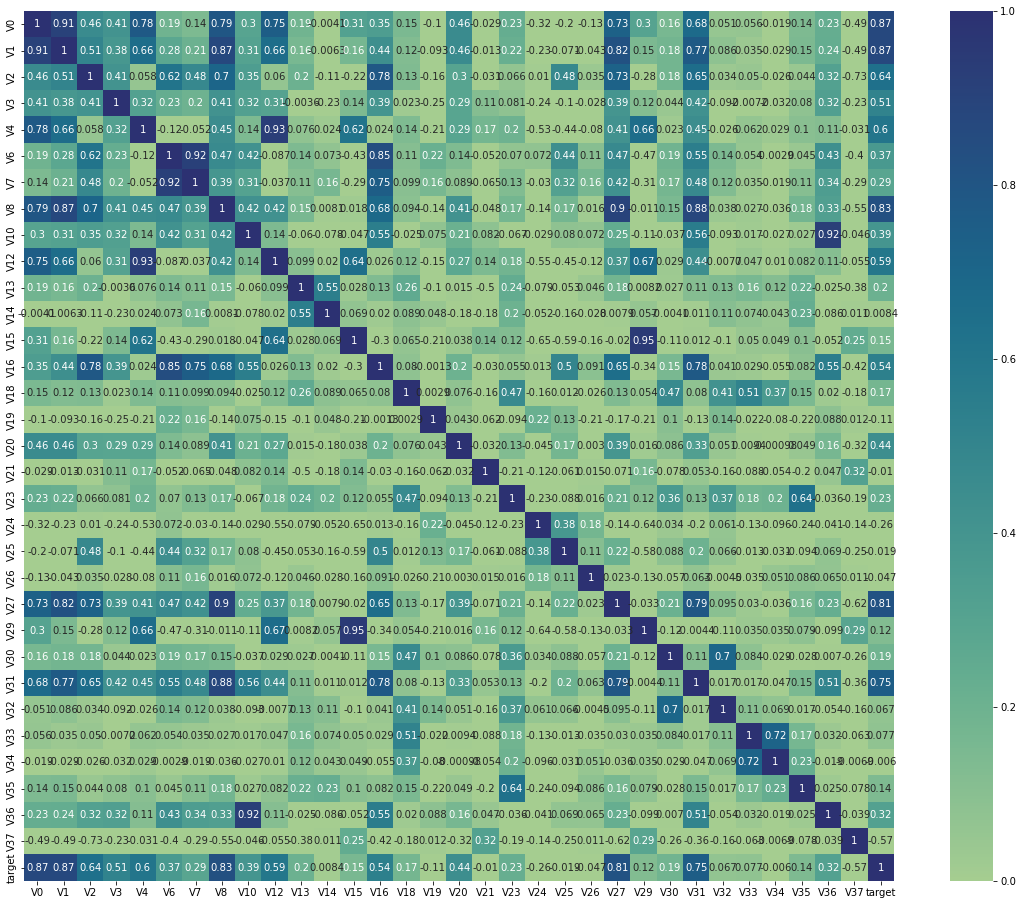

In [74]:
ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(train_corr, vmin=0,vmax=1.0, cmap="crest", square=True, annot=True)

筛选变量-基于相关系数

排序筛选

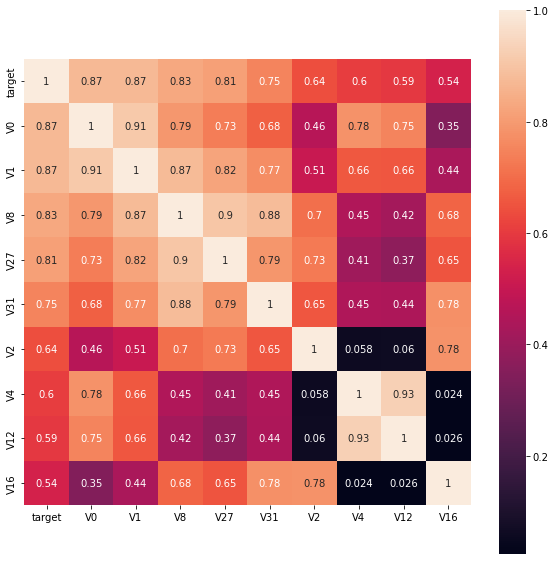

In [102]:
data_train1 = train_data.drop(['V5','V9','V11','V17','V22','V28'], axis=1)
train_corr = data_train1.corr()

## 注意train_corr本身是一个dataframe结构，data_train1也是，train_data也是

k=10

## 降序返回column中具有最大值的前n行，其本身还是一个dataframe，相当于对原有df做了截断，只截取前10行
t1 = train_corr.nlargest(n=k, columns='target')

## 先获取t1的['target']列，实际是一个series，提取这个series的index; 此处就是 与target相关系数 前10的特征的名称
cols = t1['target'].index
## data_train1[cols].values 将dataframe转为numpy
cm = np.corrcoef(data_train1[cols].values.T)
hm = plt.subplots(figsize=(10,10))
hm = sns.heatmap(data_train1[cols].corr(), annot=True, square=True)
# hm = sns.heatmap(cm,                     annot=True, square=True) # 直接用cm也行，但这样heatmap的标签不是V0/1/2/...


取值筛选

Index(['V0', 'V1', 'V8', 'V27', 'V31', 'target'], dtype='object')


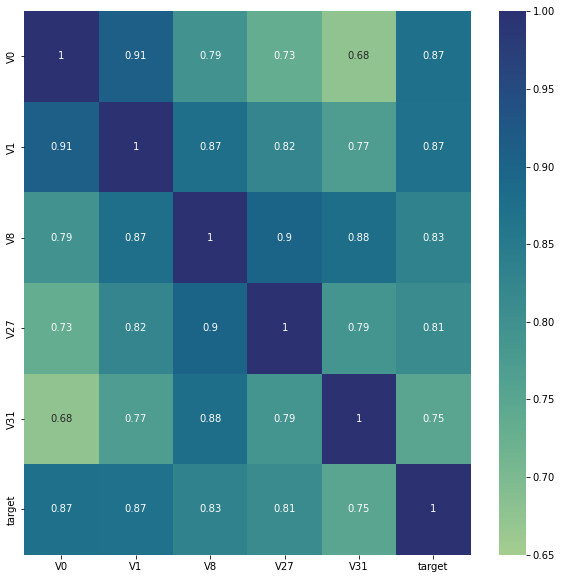

In [112]:
threshold=0.65
# #                  算train_data相关系数（注意矩阵是对称的），再从index中筛选
top_corr_features = (train_data.corr()).index[abs(train_data.corr()["target"]) > threshold]
print(top_corr_features)
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[top_corr_features].corr(),
                vmin=0.65,
                vmax=1,
                annot=True,
                # cmap="RdYlGn",
                cmap='crest'
                )

Box-Cox变换

让非正态数据趋近正态

归一化处理

Min-Max Normalization, 所有结果∈[0,1]

x'=(x-min(x))/(max(x)-min(x))

In [132]:
## 把 train_data 和 test_data 一上一下拼接起来
data_all = pd.concat([train_data.drop(['target'],axis=1), test_data])

data_all.drop(['V5', 'V9', 'V11', 'V17', 'V22', 'V28'], axis=1, inplace=True) # inplace即是否作用在当前df上
data_all.head()

cols_numeric = list(data_all.columns) # 获取data_all的所有列，并转为list

print(f"cols_numeric is {cols_numeric}")

def scale_minmax(col):
    return (col-col.min())/(col.max()-col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis=0)
data_all[cols_numeric].describe()

# data_all = data_all.apply(scale_minmax, axis=0)
# data_all.describe()

cols_numeric is ['V0', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37']


V0           V1           V2           V3           V4  ...  \
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  ...   
mean      0.694172     0.721357     0.602300     0.603139     0.523743  ...   
std       0.144198     0.131443     0.140628     0.152462     0.106430  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.626676     0.679416     0.514414     0.503888     0.478182  ...   
50%       0.729488     0.752497     0.617072     0.614270     0.535866  ...   
75%       0.790195     0.799553     0.700464     0.710474     0.585036  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V33          V34          V35          V36          V37  
count  4813.000000  4813.000000  4813.000000  4813.000000  4813.000000  
mean      0.458493     0.483790     0.762873     0.332385     0.545795  
std       0.099095     0.101020     0.102037     0.127456     0.150356  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.409037     0.454490     0.727273     0.270584     0.445647  
50%       0.454518     0.499949     0.800020     0.347056     0.539317  
75%       0.500000     0.511365     0.800020     0.414861     0.643061  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 32 columns]

Box-Cox

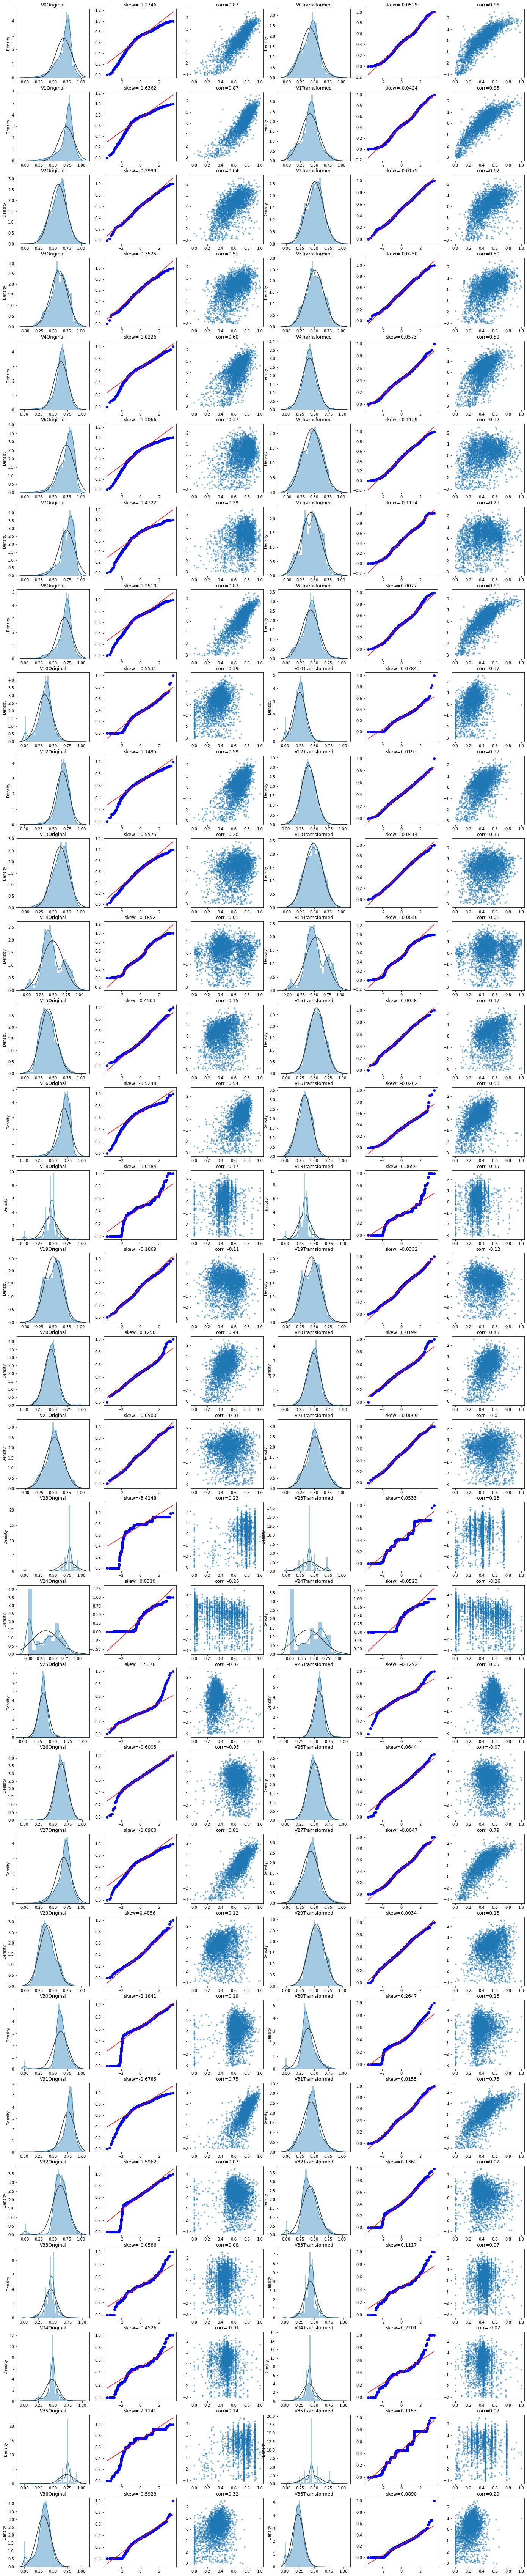

In [140]:
train_data_process = train_data[cols_numeric].apply(scale_minmax, axis=0)

test_data_process = test_data[cols_numeric].apply(scale_minmax, axis=0)

cols_numeric_left  = cols_numeric[0:-1]
# cols_numeric_left  = cols_numeric[0:13]
cols_numeric_right = cols_numeric[13:]

train_data_process = pd.concat([train_data_process, train_data['target']], axis=1)

fcols = 6
frows = len(cols_numeric_left)
plt.figure(figsize=(4*fcols, 4*frows))
i = 0
for var in cols_numeric_left:
    dat = train_data_process[[var, 'target']].dropna()
    i+=1
    plt.subplot(frows, fcols, i)
    sns.distplot(dat[var], fit=stats.norm)                     #变换前，绘制 第i个特征 核密度图，做正态拟合并对比
    plt.title(var + 'Original')
    plt.xlabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(dat[var], plot=plt)                     #变换前，绘制 第i个特征 Q-Q图
    plt.title('skew='+'{:.4f}'.format(stats.skew(dat[var])))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(dat[var], dat['target'], '.', alpha=0.5)         #变换前，绘制 第i个特征 与 target 的散点图
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
    #-----------------------------------------------------------------------------------------------------------
    #----进行Box-Cox变换
    #-----------------------------------------------------------------------------------------------------------
    i+=1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(dat[var].dropna()+1)
    trans_var = scale_minmax(trans_var)
    sns.distplot(trans_var, fit=stats.norm)                  #变换'后'，绘制 第i个特征 核密度图，做正态拟合并对比
    plt.title(var+'Tramsformed')
    plt.xlabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(trans_var, plot=plt)                  #变换'后'，绘制 第i个特征 Q-Q图
    plt.title('skew='+'{:.4f}'.format(stats.skew(trans_var)))
    plt.xlabel('')
    plt.ylabel('')
    i+=1
    plt.subplot(frows, fcols, i)
    plt.plot(trans_var, dat['target'], '.', alpha=0.5)      #变换'后'，绘制 第i个特征 与 target 的散点图
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var, dat['target'])[0][1]))